In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transformer-preprocessed-dataset/File5.csv


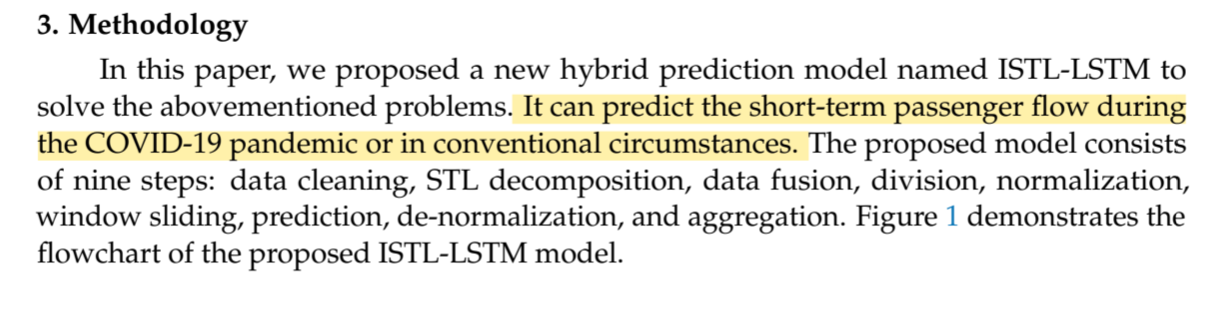

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/kaggle/input/transformer-preprocessed-dataset/File5.csv')
df

,Date_Time,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count
0,2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0
1,2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0
2,2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0
3,2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0
4,2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1755211,2024-04-20 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,20,5,0.0
1755212,2024-04-20 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,21,5,0.0
1755213,2024-04-20 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,22,5,0.0
1755214,2024-04-20 22:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,23,5,0.0


In [4]:
df.shape

(1755216, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755216 entries, 0 to 1755215
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date_Time        object 
 1   Sid              float64
 2   Did              float64
 3   Station_Pair     object 
 4   Year             int64  
 5   Month            int64  
 6   Is_Holiday       int64  
 7   Holiday_Type     int64  
 8   OneHourSlot      int64  
 9   Weekday          int64  
 10  Passenger_Count  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 147.3+ MB


In [6]:
df=df.dropna()

In [7]:
df['Date_Time']=pd.to_datetime(df['Date_Time'])
df

,Date_Time,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count
0,2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0
1,2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0
2,2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0
3,2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0
4,2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1755211,2024-04-20 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,20,5,0.0
1755212,2024-04-20 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,21,5,0.0
1755213,2024-04-20 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,22,5,0.0
1755214,2024-04-20 22:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,23,5,0.0


In [8]:
df.set_index('Date_Time', inplace=True)
df

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count
Date_Time,,,,,,,,,,
2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0
2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0
2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0
2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0
2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...
2024-04-20 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,20,5,0.0
2024-04-20 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,21,5,0.0
2024-04-20 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,22,5,0.0


In [9]:
df['Year'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1755216 entries, 2018-06-01 00:00:00 to 2024-04-20 23:00:00
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Sid              float64
 1   Did              float64
 2   Station_Pair     object 
 3   Year             int64  
 4   Month            int64  
 5   Is_Holiday       int64  
 6   Holiday_Type     int64  
 7   OneHourSlot      int64  
 8   Weekday          int64  
 9   Passenger_Count  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 147.3+ MB


In [11]:
yearcounts = df.groupby(df.index.year)['Passenger_Count'].sum().reset_index()
yearcounts.columns = ['Year', 'Total_Passenger_Count']

In [12]:
# 1. Calculate the total passenger count across all years
total_passenger_count = yearcounts['Total_Passenger_Count'].sum()

# 2. Calculate the percentage contribution of each year
yearcounts['Percentage'] = (yearcounts['Total_Passenger_Count'] / total_passenger_count) * 100

# 3. Add the percentage column to the yearcounts DataFrame
yearcounts = yearcounts[['Year', 'Total_Passenger_Count', 'Percentage']]

In [13]:
# Arrange the DataFrame in descending order by Percentage
yearcounts = yearcounts.sort_values(by='Percentage', ascending=True)
yearcounts

,Year,Total_Passenger_Count,Percentage
6,2024,1198338.0,5.246483
0,2018,1374590.0,6.018137
3,2021,3245321.0,14.208446
4,2022,3537636.0,15.488240
5,2023,4111652.0,18.001358
1,2019,4657764.0,20.392309
2,2020,4715487.0,20.645028


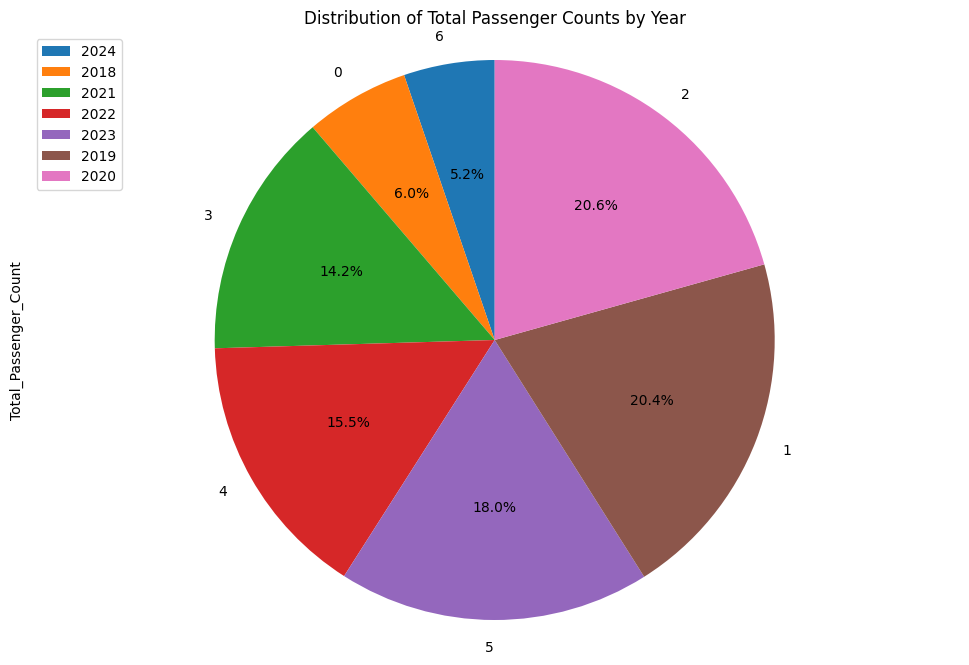

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
yearcounts['Total_Passenger_Count'].plot(kind='pie', autopct="%1.1f%%", startangle=90)
plt.title('Distribution of Total Passenger Counts by Year')
plt.axis('equal')
plt.legend(yearcounts['Year'],loc='upper left')
plt.show()

In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a new DataFrame with the desired format
df['Date_Time'] = pd.to_datetime(df.index)
df['Time_Slot'] = df['Date_Time'].dt.strftime('%H:%M')

# Create the subplots
fig = make_subplots(rows=4, cols=3, subplot_titles=[f"Month {i+1}" for i in range(1, 13)])

# Iterate over each month from 1 to 12
for month in range(1, 13):
    # Filter the data for the current month
    month_data = df[df['Month'] == month]

    # Group by Time_Slot and sum the Passenger_Count for each year
    grouped = month_data.groupby(['Time_Slot', month_data['Year']])['Passenger_Count'].sum().reset_index()

    # Plot the data for the current month
    row = (month - 1) // 3 + 1
    col = (month - 1) % 3 + 1
    for year in grouped['Year'].unique():
        year_data = grouped[grouped['Year'] == year]
        if year == 2018:
            color = 'red'
        elif year == 2019:
            color = 'pink'
        elif year == 2020:
            color = 'green'
        elif year == 2021:
            color = 'yellow'
        elif year == 2022:
            color = 'orange'
        elif year == 2023:
            color = 'blue'
        elif year == 2024:
            color = 'purple'
        fig.add_trace(go.Scatter(x=year_data['Time_Slot'], y=year_data['Passenger_Count'], mode='lines', name=str(year), line=dict(color=color)), row=row, col=col)

# Add a general title for all the subplots
fig.update_layout(
    title='Passenger Count by Time Slot for Each Month and Year',
    title_x=0.5,
    height=800,
    width=1200,
    xaxis_title='Time Slot',
    yaxis_title='Passenger Count'
)

fig.show()

In [16]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the DataFrame 'df'
df['Date'] = df.index.date
df['Year'] = df.index.year

# Aggregate the data by date and year
df_agg = df.groupby(['Date', 'Year'])['Passenger_Count'].sum().reset_index()

# Create the interactive plot
fig = make_subplots(rows=1, cols=1)

# Iterate over each year and plot the data
for year in df_agg['Year'].unique():
    year_data = df_agg[df_agg['Year'] == year]
    if year == 2018:
        color = 'red'
    elif year == 2019:
        color = 'pink'
    elif year == 2020:
        color = 'green'
    elif year == 2021:
        color = 'yellow'
    elif year == 2022:
        color = 'orange'
    elif year == 2023:
        color = 'blue'
    elif year == 2024:
        color = 'purple'
    fig.add_trace(go.Scatter(x=year_data['Date'], y=year_data['Passenger_Count'], mode='lines', name=str(year), line=dict(color=color)))

# Add labels and title
fig.update_layout(
    title='Aggregated Passenger Count by Date (2018-2024)',
    xaxis_title='Year',
    yaxis_title='Passenger Count',
    height=600,
    width=1200
)

fig.show()

In [17]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the DataFrame 'df'
df['Date'] = df.index.date
df['Year'] = df.index.year
df['Month'] = df.index.month

# Aggregate the data by month and year
df_agg = df.groupby(['Month', 'Year'])['Passenger_Count'].sum().reset_index()

# Create the interactive plot
fig = make_subplots(rows=1, cols=1)

# Iterate over each year and plot the data
for year in df_agg['Year'].unique():
    year_data = df_agg[df_agg['Year'] == year]
    if year == 2018:
        color = 'red'
    elif year == 2019:
        color = 'pink'
    elif year == 2020:
        color = 'green'
    elif year == 2021:
        color = 'yellow'
    elif year == 2022:
        color = 'orange'
    elif year == 2023:
        color = 'blue'
    elif year == 2024:
        color = 'purple'
    fig.add_trace(go.Scatter(x=year_data['Month'], y=year_data['Passenger_Count'], mode='lines', name=str(year), line=dict(color=color)))

# Add labels and title
fig.update_layout(
    title='Aggregated Passenger Count by Month (2018-2024)',
    xaxis_title='Month',
    xaxis_ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    xaxis_tickvals=list(range(1, 13)),
    yaxis_title='Passenger Count',
    height=600,
    width=1200
)

fig.show()

In [18]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the DataFrame 'df'
df['Date'] = df.index.date
df['Year'] = df.index.year

# Aggregate the data by date and year
df_agg = df.groupby(['Date', 'Year'])['Passenger_Count'].sum().reset_index()

# Create the interactive plot
fig = make_subplots(rows=2, cols=4, subplot_titles=[str(year) for year in range(2018, 2025)])

# Iterate over each year and plot the data
for i, year in enumerate(range(2018, 2025)):
    row = (i) // 4 + 1
    col = (i) % 4 + 1
    year_data = df_agg[df_agg['Year'] == year]
    if year == 2018:
        color = 'red'
    elif year == 2019:
        color = 'pink'
    elif year == 2020:
        color = 'green'
    elif year == 2021:
        color = 'yellow'
    elif year == 2022:
        color = 'orange'
    elif year == 2023:
        color = 'blue'
    elif year == 2024:
        color = 'purple'
    fig.add_trace(go.Scatter(x=year_data['Date'], y=year_data['Passenger_Count'], mode='lines', name=str(year), line=dict(color=color)), row=row, col=col)

# Add a general title for all the subplots
fig.update_layout(
    title='Aggregated Passenger Count by Date for Each Year (2018-2024)',
    title_x=0.5,
    height=800,
    width=1200,
    xaxis_title='Date',
    yaxis_title='Passenger Count'
)

fig.show()

In [19]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming you have the DataFrame 'df'
df['Date'] = df.index.date
df['Year'] = df.index.year
df['Month'] = df.index.month

# Aggregate the data by month and year
df_agg = df.groupby(['Month', 'Year'])['Passenger_Count'].sum().reset_index()

# Create the interactive plot
fig = make_subplots(rows=7, cols=1, subplot_titles=[str(year) for year in range(2018, 2025)])

# Iterate over each year and plot the data
for i, year in enumerate(range(2018, 2025)):
    row = i + 1
    year_data = df_agg[df_agg['Year'] == year]
    if year == 2018:
        color = 'red'
    elif year == 2019:
        color = 'pink'
    elif year == 2020:
        color = 'green'
    elif year == 2021:
        color = 'yellow'
    elif year == 2022:
        color = 'orange'
    elif year == 2023:
        color = 'blue'
    elif year == 2024:
        color = 'purple'
    fig.add_trace(go.Scatter(x=year_data['Month'], y=year_data['Passenger_Count'], mode='lines', name=str(year), line=dict(color=color)), row=row, col=1)

# Add labels and title
fig.update_layout(
    title='Aggregated Passenger Count by Month for Each Year (2018-2024)',
    title_x=0.5,
    height=1400,
    width=1400,
    xaxis_title='Month',
    xaxis_ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    xaxis_tickvals=list(range(1, 13)),
    yaxis_title='Passenger Count'
)

fig.show()

In [20]:
import pandas as pd

# Step 1: Pre-Pandemic Stability (2018 and 2019)
df_pre_pandemic = df[(df['Year'] == 2018) | (df['Year'] == 2019)]

# Step 2: Pandemic Impact (2020)
df_pandemic = df[df['Year'] == 2020]

# Step 3: Recovery and New Normal (2021 to 2023)
df_recovery = df[(df['Year'] >= 2021) & (df['Year'] <= 2023)]

# Step 4: Recent Trends (2024)
df_recent = df[df['Year'] == 2024]

# Display the shape of each filtered DataFrame to verify the filtering
print("Pre-Pandemic (2018-2019):", df_pre_pandemic.shape)
print("Pandemic Impact (2020):", df_pandemic.shape)
print("Recovery and New Normal (2021-2023):", df_recovery.shape)
print("Recent Trends (2024):", df_recent.shape)


Pre-Pandemic (2018-2019): (472464, 13)
Pandemic Impact (2020): (298656, 13)
Recovery and New Normal (2021-2023): (893520, 13)
Recent Trends (2024): (90576, 13)


In [21]:
# Aggregate the data by date and year
df_pre_pandemic_agg = df_pre_pandemic.groupby(df_pre_pandemic.index.date)['Passenger_Count'].sum().reset_index()
df_pandemic_agg = df_pandemic.groupby(df_pandemic.index.date)['Passenger_Count'].sum().reset_index()
df_recovery_agg = df_recovery.groupby(df_recovery.index.date)['Passenger_Count'].sum().reset_index()
df_recent_agg = df_recent.groupby(df_recent.index.date)['Passenger_Count'].sum().reset_index()

# Rename columns for consistency
df_pre_pandemic_agg.columns = ['Date', 'Passenger_Count']
df_pandemic_agg.columns = ['Date', 'Passenger_Count']
df_recovery_agg.columns = ['Date', 'Passenger_Count']
df_recent_agg.columns = ['Date', 'Passenger_Count']

# Add a 'Year' column for each aggregated DataFrame
df_pre_pandemic_agg['Year'] = df_pre_pandemic_agg['Date'].apply(lambda x: x.year)
df_pandemic_agg['Year'] = df_pandemic_agg['Date'].apply(lambda x: x.year)
df_recovery_agg['Year'] = df_recovery_agg['Date'].apply(lambda x: x.year)
df_recent_agg['Year'] = df_recent_agg['Date'].apply(lambda x: x.year)

# Display the first few rows of each aggregated DataFrame to verify the aggregation
print("Pre-Pandemic Aggregated (2018-2019):")
print(df_pre_pandemic_agg.head())

print("Pandemic Impact Aggregated (2020):")
print(df_pandemic_agg.head())

print("Recovery and New Normal Aggregated (2021-2023):")
print(df_recovery_agg.head())

print("Recent Trends Aggregated (2024):")
print(df_recent_agg.head())


Pre-Pandemic Aggregated (2018-2019):
         Date  Passenger_Count  Year
0  2018-06-01              0.0  2018
1  2018-06-02              0.0  2018
2  2018-06-03              0.0  2018
3  2018-06-04              0.0  2018
4  2018-06-05              0.0  2018
Pandemic Impact Aggregated (2020):
         Date  Passenger_Count  Year
0  2020-01-01          13868.0  2020
1  2020-01-02          14310.0  2020
2  2020-01-03          14035.0  2020
3  2020-01-04          13466.0  2020
4  2020-01-05           9201.0  2020
Recovery and New Normal Aggregated (2021-2023):
         Date  Passenger_Count  Year
0  2021-01-01           8932.0  2021
1  2021-01-02           8493.0  2021
2  2021-01-03           5824.0  2021
3  2021-01-04           9417.0  2021
4  2021-01-05           8538.0  2021
Recent Trends Aggregated (2024):
         Date  Passenger_Count  Year
0  2024-01-01          10174.0  2024
1  2024-01-02          11877.0  2024
2  2024-01-03          12363.0  2024
3  2024-01-04          10348.0  2

In [22]:
# Combine the aggregated dataframes
df_combined = pd.concat([df_pre_pandemic_agg, df_pandemic_agg, df_recovery_agg, df_recent_agg])

# Sort by date to ensure proper time series order
df_combined = df_combined.sort_values(by='Date').reset_index(drop=True)

# Display the combined dataframe
print("Combined Dataframe:")
print(df_combined.head())


Combined Dataframe:
         Date  Passenger_Count  Year
0  2018-06-01              0.0  2018
1  2018-06-02              0.0  2018
2  2018-06-03              0.0  2018
3  2018-06-04              0.0  2018
4  2018-06-05              0.0  2018


In [23]:
import plotly.graph_objects as go

# Create an interactive plot
fig = go.Figure()

# Iterate over each year and plot the data
for year in df_combined['Year'].unique():
    year_data = df_combined[df_combined['Year'] == year]
    fig.add_trace(go.Scatter(x=year_data['Date'], y=year_data['Passenger_Count'], mode='lines', name=str(year)))

# Add labels and title
fig.update_layout(
    title='Aggregated Passenger Count by Date (2018-2024)',
    xaxis_title='Date',
    yaxis_title='Passenger Count',
    height=600,
    width=1200
)

fig.show()


In [24]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the passenger count data
scaler = MinMaxScaler(feature_range=(0, 1))
df_combined['Passenger_Count'] = scaler.fit_transform(df_combined['Passenger_Count'].values.reshape(-1, 1))

# Create training and test sets
train_size = int(len(df_combined) * 0.8)
test_size = len(df_combined) - train_size
train, test = df_combined[0:train_size], df_combined[train_size:len(df_combined)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape the data into the format required by LSTM
look_back = 60  # Number of previous time steps to use as input variables
trainX, trainY = create_dataset(train[['Passenger_Count']].values, look_back)
testX, testY = create_dataset(test[['Passenger_Count']].values, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print("Training data shape:", trainX.shape, trainY.shape)
print("Testing data shape:", testX.shape, testY.shape)


Training data shape: (1659, 60, 1) (1659,)
Testing data shape: (370, 60, 1) (370,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(np.mean((trainPredict[:,0] - trainY[0]) ** 2))
testScore = np.sqrt(np.mean((testPredict[:,0] - testY[0]) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


2024-07-17 10:36:31.346959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 10:36:31.347110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 10:36:31.546710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1659/1659 - 42s - 25ms/step - loss: 0.0172
Epoch 2/20
1659/1659 - 39s - 23ms/step - loss: 0.0144
Epoch 3/20
1659/1659 - 39s - 24ms/step - loss: 0.0136
Epoch 4/20
1659/1659 - 39s - 24ms/step - loss: 0.0134
Epoch 5/20
1659/1659 - 39s - 24ms/step - loss: 0.0112
Epoch 6/20
1659/1659 - 39s - 24ms/step - loss: 0.0113
Epoch 7/20
1659/1659 - 39s - 23ms/step - loss: 0.0103
Epoch 8/20
1659/1659 - 39s - 23ms/step - loss: 0.0093
Epoch 9/20
1659/1659 - 39s - 24ms/step - loss: 0.0084
Epoch 10/20
1659/1659 - 39s - 23ms/step - loss: 0.0083
Epoch 11/20
1659/1659 - 39s - 24ms/step - loss: 0.0084
Epoch 12/20
1659/1659 - 39s - 24ms/step - loss: 0.0086
Epoch 13/20
1659/1659 - 39s - 24ms/step - loss: 0.0079
Epoch 14/20
1659/1659 - 39s - 24ms/step - loss: 0.0073
Epoch 15/20
1659/1659 - 39s - 23ms/step - loss: 0.0071
Epoch 16/20
1659/1659 - 39s - 23ms/step - loss: 0.0071
Epoch 17/20
1659/1659 - 39s - 23ms/step - loss: 0.0067
Epoch 18/20
1659/1659 - 40s - 24ms/step - loss: 0.0066
Epoch 19/20
1659/1659 - 39s - 

#### A high RMSE on the training set indicates that the model is not fitting the training data well.
The test RMSE being lower than the training RMSE is happening because the model is underfitting the training data but performs relatively better on unseen data but However, ideally, the training RMSE should be lower than the test RMSE.

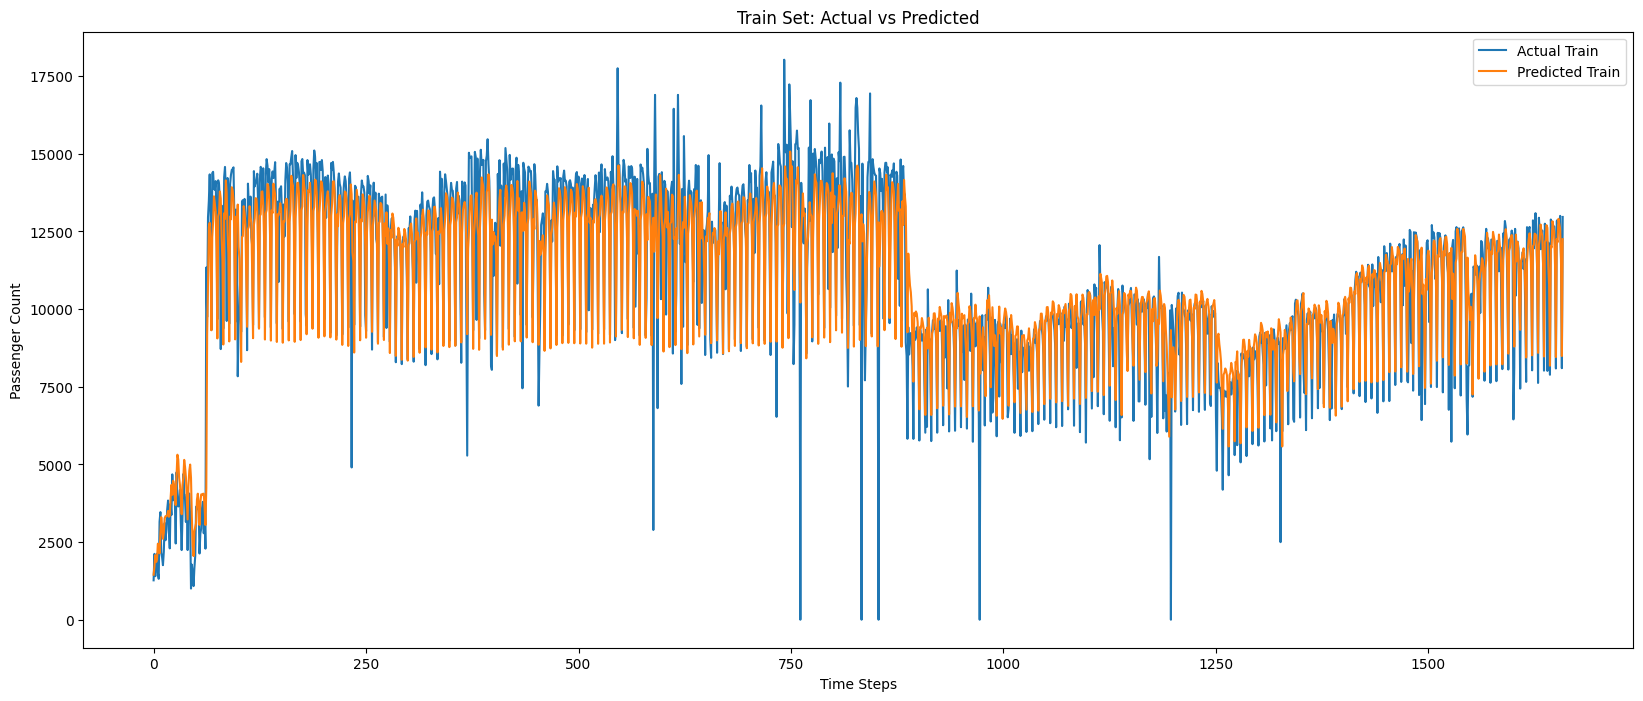

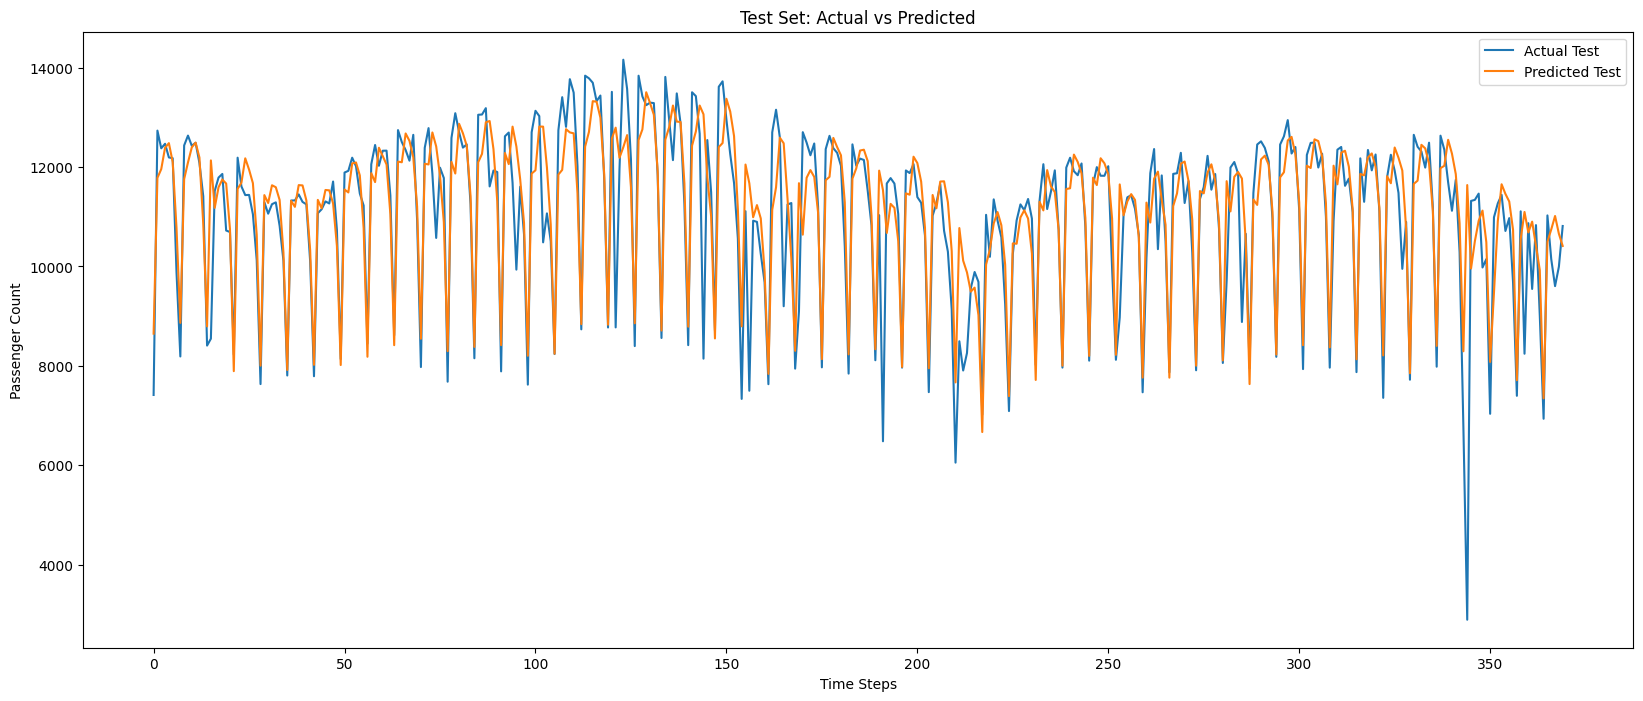

In [26]:
import matplotlib.pyplot as plt

# Plot training predictions
plt.figure(figsize=(20, 8))
plt.plot(trainY[0], label='Actual Train')
plt.plot(trainPredict[:, 0], label='Predicted Train')
plt.title('Train Set: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

# Plot testing predictions
plt.figure(figsize=(20, 8))
plt.plot(testY[0], label='Actual Test')
plt.plot(testPredict[:, 0], label='Predicted Test')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


### increasing model complexity

### STL Decomposition

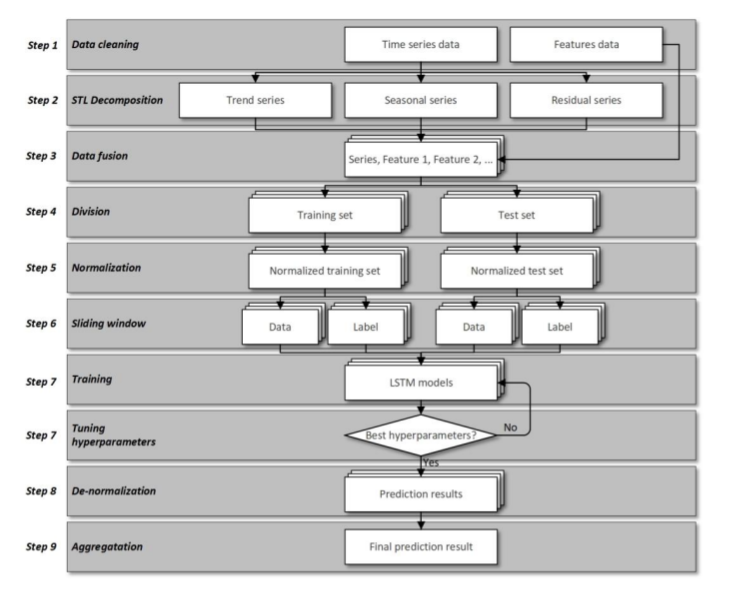

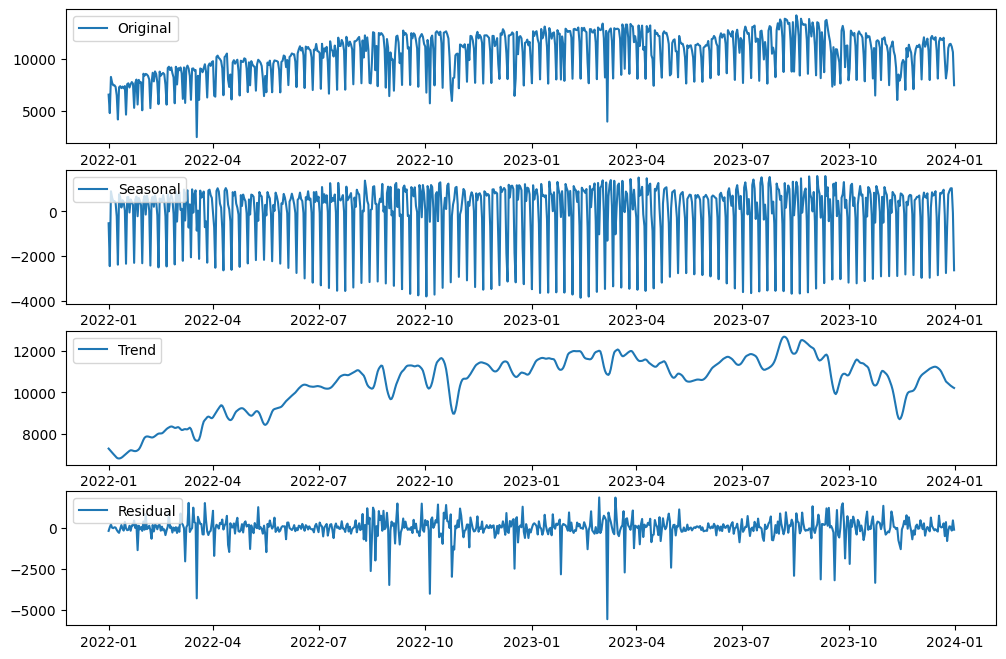

In [27]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Filter data for 2022 and 2023
df_temp = df[(df.index.year >= 2022) & (df.index.year <= 2023)].copy()


df_temp = df_temp.drop(columns=['Date'], errors='ignore')


numeric_cols = df_temp.select_dtypes(include=[np.number]).columns.tolist()

# Aggregate numeric columns by day for STL decomposition
df_daily_temp = df_temp[numeric_cols].resample('D').sum()

# STL decomposition
stl = STL(df_daily_temp['Passenger_Count'], seasonal=7)
result = stl.fit()

# Extract the components
seasonal, trend, residual = result.seasonal, result.trend, result.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_daily_temp['Passenger_Count'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.show()


### data fusion

In [28]:
train_size = int(len(seasonal) * 0.8)
test_size = len(seasonal) - train_size

# Split into training and testing sets
seasonal_train, seasonal_test = seasonal[:train_size], seasonal[train_size:]
trend_train, trend_test = trend[:train_size], trend[train_size:]
residual_train, residual_test = residual[:train_size], residual[train_size:]


### normalizing 

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler_seasonal = MinMaxScaler(feature_range=(0, 1))
scaler_trend = MinMaxScaler(feature_range=(0, 1))
scaler_residual = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
seasonal_train_scaled = scaler_seasonal.fit_transform(seasonal_train.values.reshape(-1, 1))
trend_train_scaled = scaler_trend.fit_transform(trend_train.values.reshape(-1, 1))
residual_train_scaled = scaler_residual.fit_transform(residual_train.values.reshape(-1, 1))

# Transform the test data
seasonal_test_scaled = scaler_seasonal.transform(seasonal_test.values.reshape(-1, 1))
trend_test_scaled = scaler_trend.transform(trend_test.values.reshape(-1, 1))
residual_test_scaled = scaler_residual.transform(residual_test.values.reshape(-1, 1))


### window sliding

In [30]:
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 24  

# Create sliding windows for each component
seasonal_X_train, seasonal_y_train = create_sliding_window(seasonal_train_scaled, window_size)
trend_X_train, trend_y_train = create_sliding_window(trend_train_scaled, window_size)
residual_X_train, residual_y_train = create_sliding_window(residual_train_scaled, window_size)

seasonal_X_test, seasonal_y_test = create_sliding_window(seasonal_test_scaled, window_size)
trend_X_test, trend_y_test = create_sliding_window(trend_test_scaled, window_size)
residual_X_test, residual_y_test = create_sliding_window(residual_test_scaled, window_size)

# Combine the components to create the input features
X_train = np.concatenate((seasonal_X_train, trend_X_train, residual_X_train), axis=2)
y_train = seasonal_y_train + trend_y_train + residual_y_train

X_test = np.concatenate((seasonal_X_test, trend_X_test, residual_X_test), axis=2)
y_test = seasonal_y_test + trend_y_test + residual_y_test

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (560, 24, 3) (560, 1)
Testing data shape: (122, 24, 3) (122, 1)


### training the lstm

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, 3)))  # 3 components: seasonal, trend, residual
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Invert predictions to original scale
trainPredict = scaler_seasonal.inverse_transform(trainPredict)
y_train = scaler_seasonal.inverse_transform(y_train)
testPredict = scaler_seasonal.inverse_transform(testPredict)
y_test = scaler_seasonal.inverse_transform(y_test)

# Calculate root mean squared error
trainScore = np.sqrt(np.mean((trainPredict[:,0] - y_train[:,0]) ** 2))
testScore = np.sqrt(np.mean((testPredict[:,0] - y_test[:,0]) ** 2))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



560/560 - 9s - 16ms/step - loss: 0.1620
Epoch 2/20
560/560 - 6s - 11ms/step - loss: 0.1009
Epoch 3/20
560/560 - 6s - 11ms/step - loss: 0.0892
Epoch 4/20
560/560 - 6s - 11ms/step - loss: 0.0683
Epoch 5/20
560/560 - 6s - 11ms/step - loss: 0.0470
Epoch 6/20
560/560 - 6s - 11ms/step - loss: 0.0412
Epoch 7/20
560/560 - 6s - 11ms/step - loss: 0.0358
Epoch 8/20
560/560 - 6s - 11ms/step - loss: 0.0280
Epoch 9/20
560/560 - 6s - 11ms/step - loss: 0.0267
Epoch 10/20
560/560 - 6s - 11ms/step - loss: 0.0218
Epoch 11/20
560/560 - 6s - 11ms/step - loss: 0.0210
Epoch 12/20
560/560 - 6s - 11ms/step - loss: 0.0176
Epoch 13/20
560/560 - 6s - 11ms/step - loss: 0.0175
Epoch 14/20
560/560 - 6s - 11ms/step - loss: 0.0163
Epoch 15/20
560/560 - 6s - 11ms/step - loss: 0.0166
Epoch 16/20
560/560 - 6s - 10ms/step - loss: 0.0161
Epoch 17/20
560/560 - 6s - 11ms/step - loss: 0.0161
Epoch 18/20
560/560 - 6s - 11ms/step - loss: 0.0167
Epoch 19/20
560/560 - 6s - 11ms/step - loss: 0.0162
Epoch 20/20
560/560 - 10s - 18ms

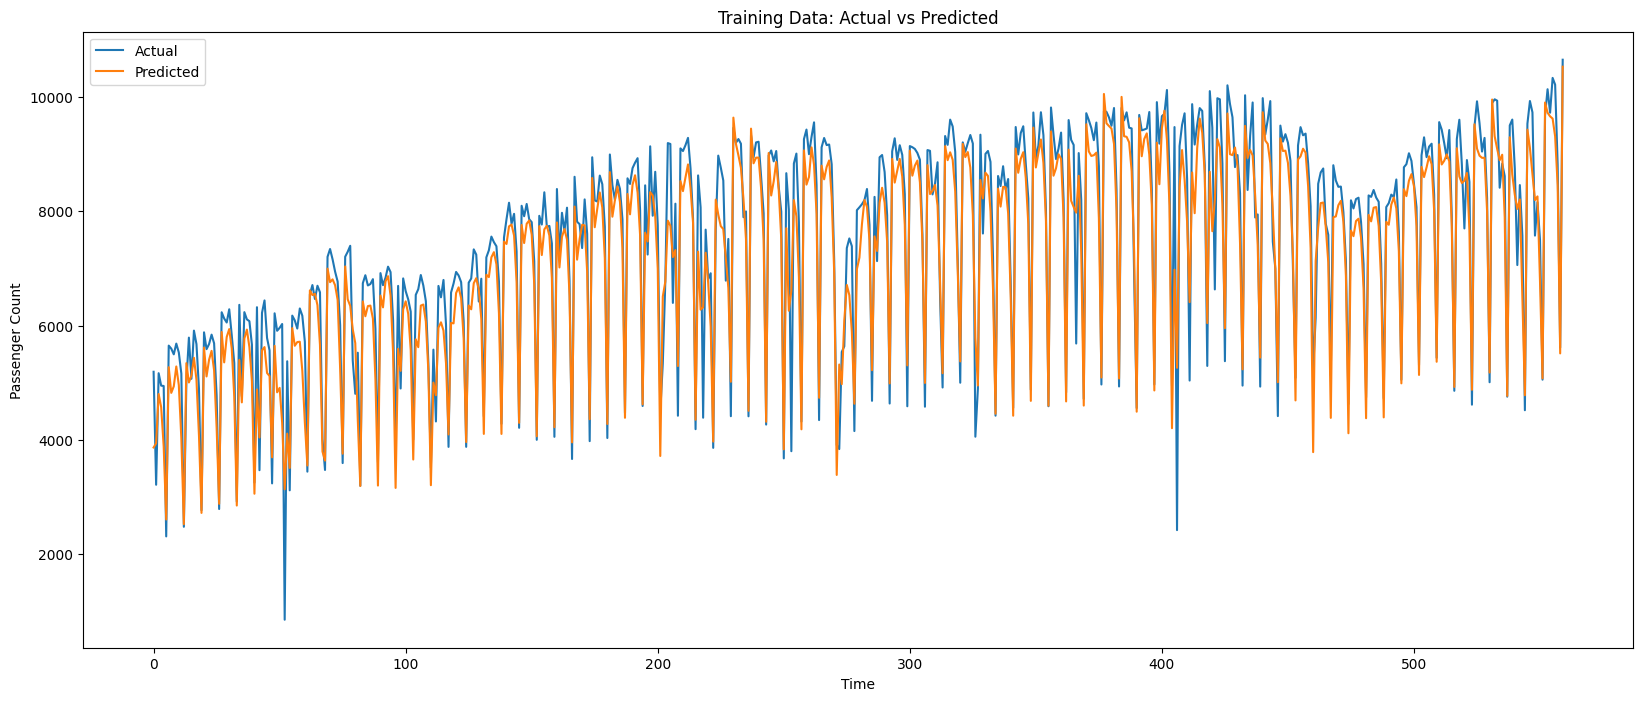

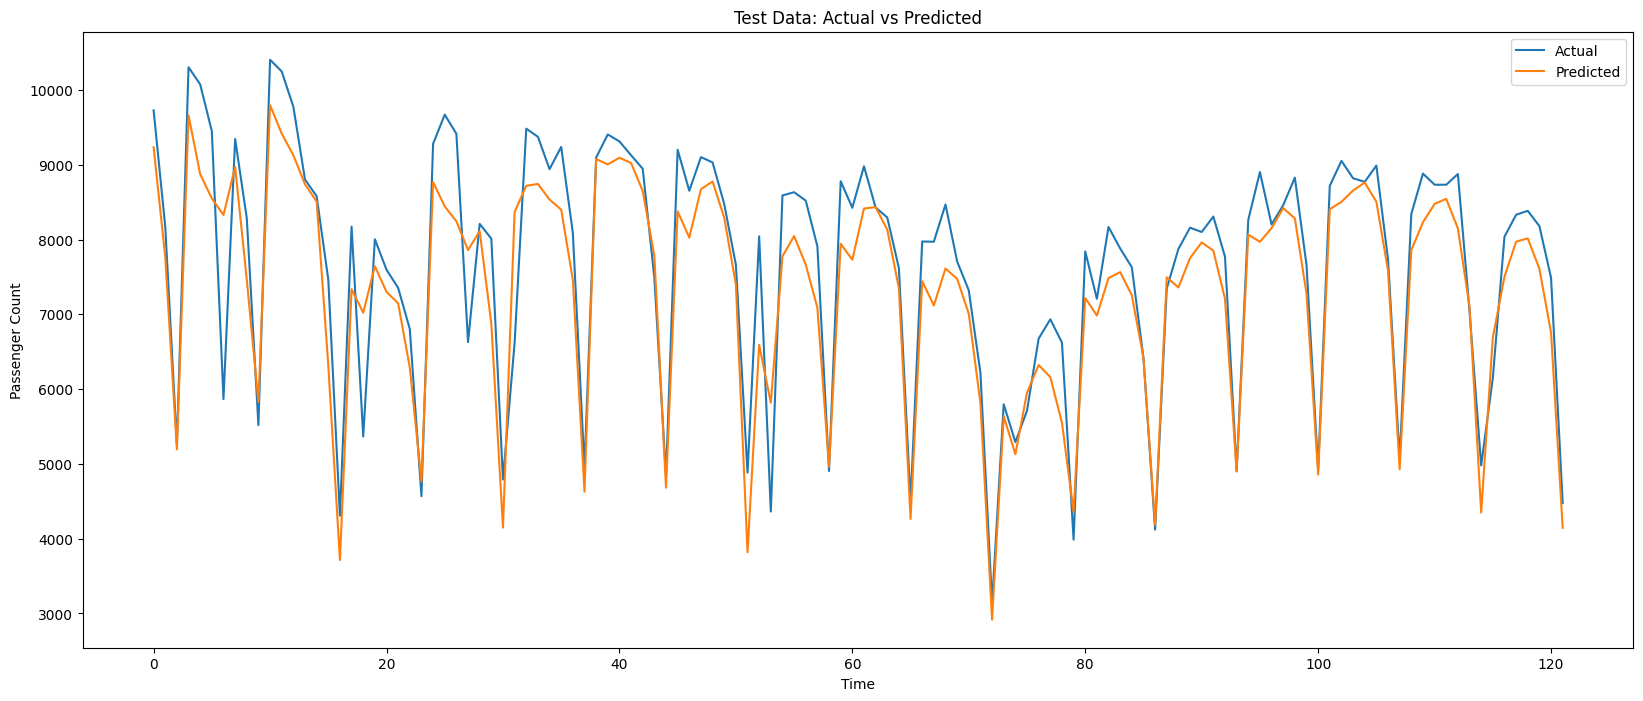

In [32]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual for training data
plt.figure(figsize=(20, 8))
plt.plot(y_train, label='Actual')
plt.plot(trainPredict, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

# Plotting predictions vs actual for test data
plt.figure(figsize=(20, 8))
plt.plot(y_test, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


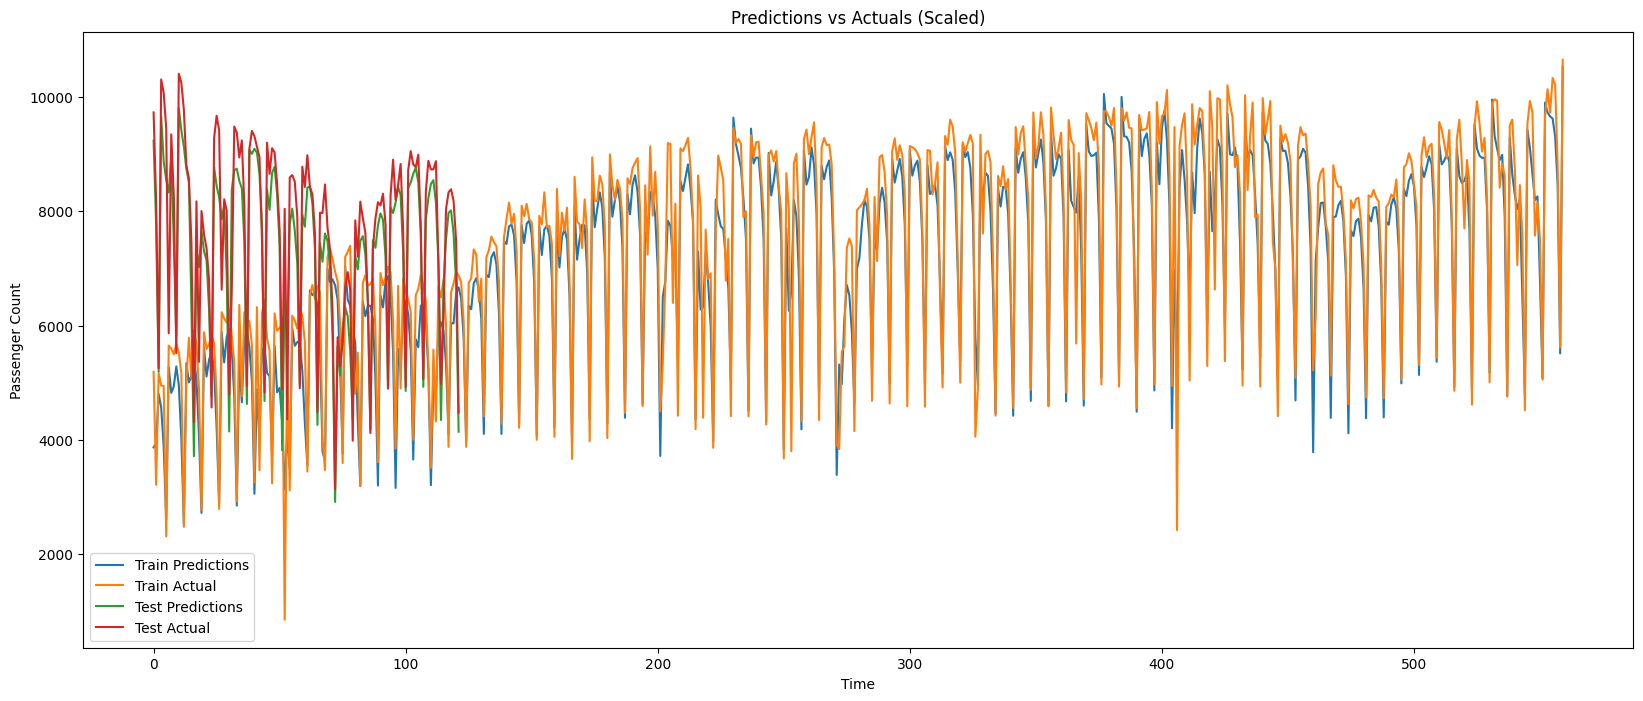

In [33]:
# Plotting RMSE over time
plt.figure(figsize=(20, 8))
plt.plot(trainPredict[:,0], label='Train Predictions')
plt.plot(y_train[:,0], label='Train Actual')
plt.plot(testPredict[:,0], label='Test Predictions')
plt.plot(y_test[:,0], label='Test Actual')
plt.title('Predictions vs Actuals (Scaled)')
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()


In [34]:
model.save('lstm_model.h5')

Train RMSE: 624.88
Test RMSE: 654.19
Train MAE: 486.06
Test MAE: 512.37
Train MAPE: 7.53%
Test MAPE: 6.97%


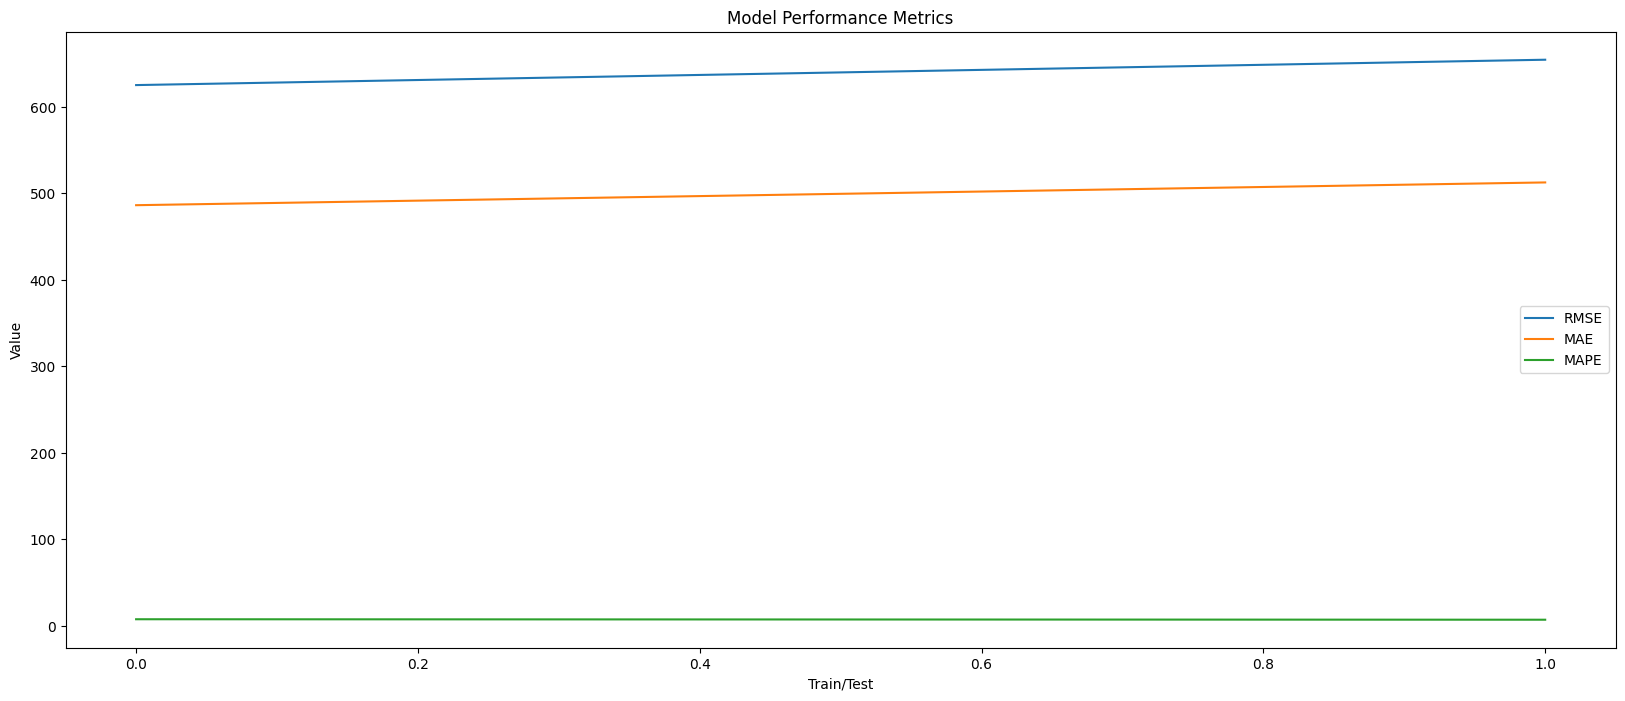

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MAE, and MAPE
trainRMSE = np.sqrt(mean_squared_error(y_train[:,0], trainPredict[:,0]))
testRMSE = np.sqrt(mean_squared_error(y_test[:,0], testPredict[:,0]))

trainMAE = mean_absolute_error(y_train[:,0], trainPredict[:,0])
testMAE = mean_absolute_error(y_test[:,0], testPredict[:,0])

trainMAPE = np.mean(np.abs((y_train[:,0] - trainPredict[:,0]) / y_train[:,0])) * 100
testMAPE = np.mean(np.abs((y_test[:,0] - testPredict[:,0]) / y_test[:,0])) * 100

print('Train RMSE: %.2f' % trainRMSE)
print('Test RMSE: %.2f' % testRMSE)
print('Train MAE: %.2f' % trainMAE)
print('Test MAE: %.2f' % testMAE)
print('Train MAPE: %.2f%%' % trainMAPE)
print('Test MAPE: %.2f%%' % testMAPE)

# Plot RMSE, MAE, and MAPE
plt.figure(figsize=(20, 8))
plt.plot([trainRMSE, testRMSE], label='RMSE')
plt.plot([trainMAE, testMAE], label='MAE')
plt.plot([trainMAPE, testMAPE], label='MAPE')
plt.title('Model Performance Metrics')
plt.xlabel('Train/Test')
plt.ylabel('Value')
plt.legend()
plt.show()

### preparing data from lstm

In [36]:
df

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,Date_Time,Time_Slot,Date
Date_Time,,,,,,,,,,,,,
2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0,2018-06-01 00:00:00,00:00,2018-06-01
2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0,2018-06-01 01:00:00,01:00,2018-06-01
2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0,2018-06-01 02:00:00,02:00,2018-06-01
2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0,2018-06-01 03:00:00,03:00,2018-06-01
2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0,2018-06-01 04:00:00,04:00,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-20 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,20,5,0.0,2024-04-20 19:00:00,19:00,2024-04-20
2024-04-20 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,21,5,0.0,2024-04-20 20:00:00,20:00,2024-04-20
2024-04-20 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,22,5,0.0,2024-04-20 21:00:00,21:00,2024-04-20


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Function to create dataset for LSTM
def create_lstm_dataset(data, look_back=60):
    dataX, dataY = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back)]
        dataX.append(a)
        dataY.append(data[i + look_back])
    return np.array(dataX), np.array(dataY)

# Function to train STL-LSTM model
def train_stl_lstm_model(X, Y, phase_name):
    model = Sequential([
        LSTM(50, input_shape=(X.shape[1], X.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, Y, epochs=50, batch_size=32, verbose=0)
    
    # Save the trained model
    model.save(f'{phase_name}_stl_lstm_model.h5')
    
    # Predict using the trained model
    trainPredict = model.predict(X)
    
    return trainPredict


In [38]:
# Step 1: Pre-Pandemic Stability (2018 and 2019)
df_pre_pandemic = df[(df['Year'] == 2018) | (df['Year'] == 2019)]

# Step 2: Pandemic Impact (2020)
df_pandemic = df[df['Year'] == 2020]

# Step 3: Recovery and New Normal (2021 to 2023)
df_recovery = df[(df['Year'] >= 2021) & (df['Year'] <= 2023)]

# Step 4: Recent Trends (2024)
df_recent = df[df['Year'] == 2024]

# Aggregate the data by date and year
df_pre_pandemic_agg = df_pre_pandemic.groupby(df_pre_pandemic.index.date)['Passenger_Count'].sum().reset_index()
df_pandemic_agg = df_pandemic.groupby(df_pandemic.index.date)['Passenger_Count'].sum().reset_index()
df_recovery_agg = df_recovery.groupby(df_recovery.index.date)['Passenger_Count'].sum().reset_index()
df_recent_agg = df_recent.groupby(df_recent.index.date)['Passenger_Count'].sum().reset_index()

# Rename columns for consistency
df_pre_pandemic_agg.columns = ['Date', 'Passenger_Count']
df_pandemic_agg.columns = ['Date', 'Passenger_Count']
df_recovery_agg.columns = ['Date', 'Passenger_Count']
df_recent_agg.columns = ['Date', 'Passenger_Count']

# Add a 'Year' column for each aggregated DataFrame
df_pre_pandemic_agg['Year'] = df_pre_pandemic_agg['Date'].apply(lambda x: x.year)
df_pandemic_agg['Year'] = df_pandemic_agg['Date'].apply(lambda x: x.year)
df_recovery_agg['Year'] = df_recovery_agg['Date'].apply(lambda x: x.year)
df_recent_agg['Year'] = df_recent_agg['Date'].apply(lambda x: x.year)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


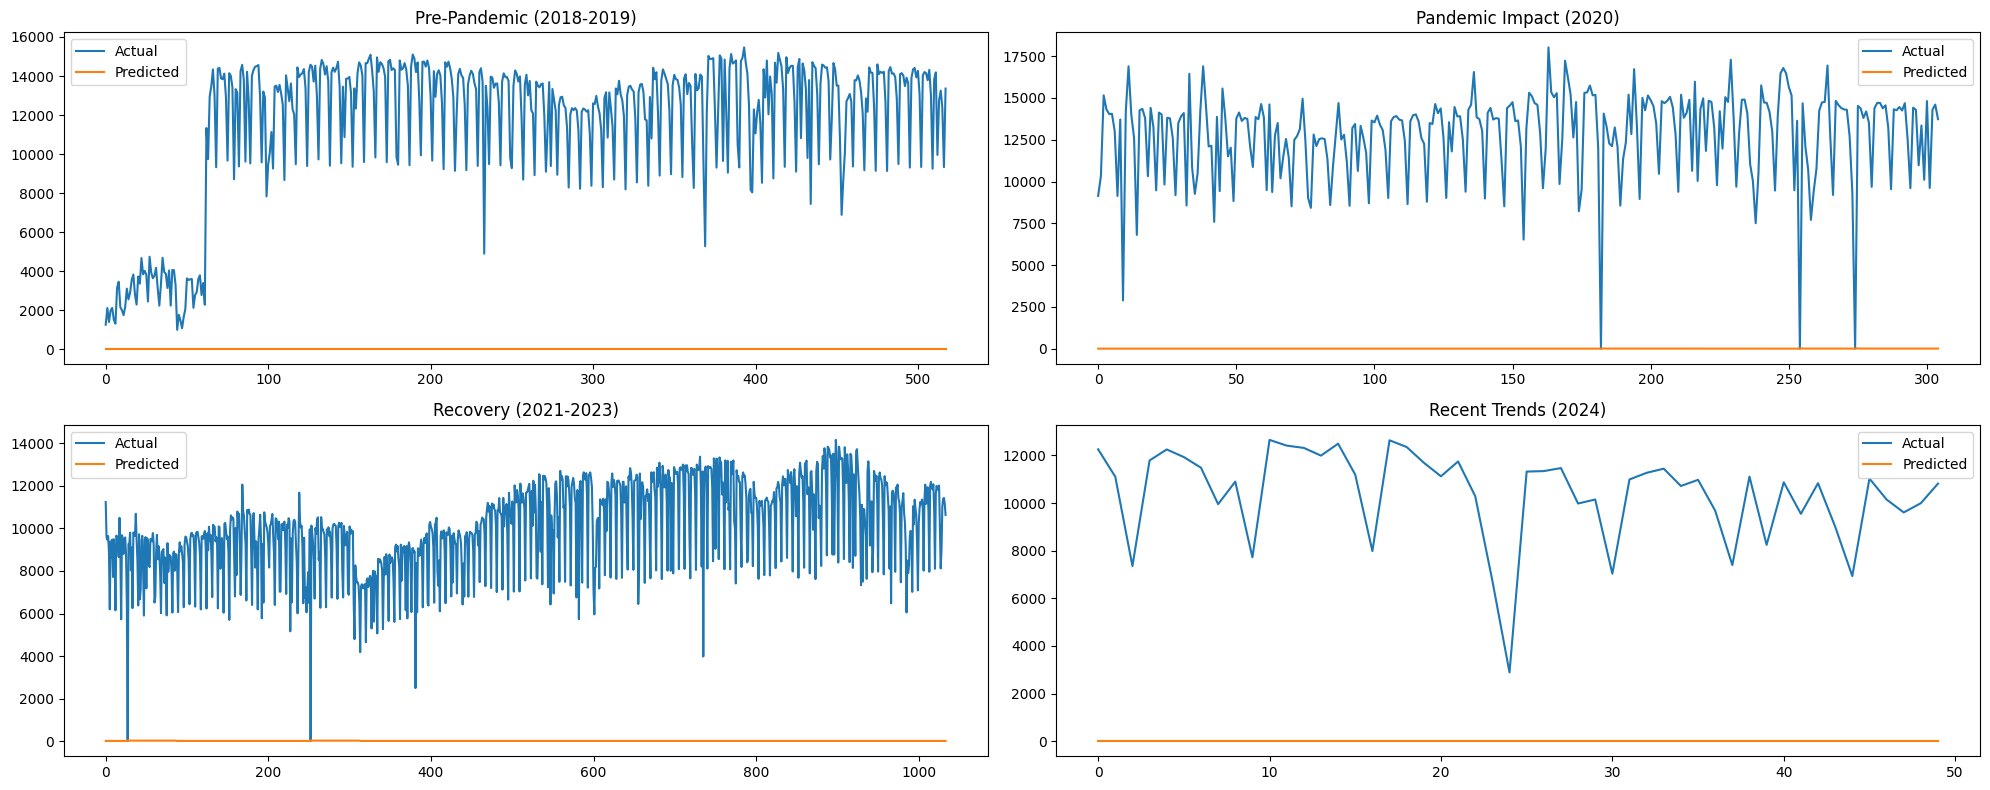

In [39]:
# Prepare data for each phase
X_pre_pandemic, Y_pre_pandemic = create_lstm_dataset(df_pre_pandemic_agg['Passenger_Count'].values.reshape(-1, 1))
X_pandemic, Y_pandemic = create_lstm_dataset(df_pandemic_agg['Passenger_Count'].values.reshape(-1, 1))
X_recovery, Y_recovery = create_lstm_dataset(df_recovery_agg['Passenger_Count'].values.reshape(-1, 1))
X_recent, Y_recent = create_lstm_dataset(df_recent_agg['Passenger_Count'].values.reshape(-1, 1))

# Train STL-LSTM models and get predictions
trainPredict_pre_pandemic = train_stl_lstm_model(X_pre_pandemic, Y_pre_pandemic, 'Pre_Pandemic')
trainPredict_pandemic = train_stl_lstm_model(X_pandemic, Y_pandemic, 'Pandemic_Impact')
trainPredict_recovery = train_stl_lstm_model(X_recovery, Y_recovery, 'Recovery')
trainPredict_recent = train_stl_lstm_model(X_recent, Y_recent, 'Recent_Trends')

# Plot predicted vs actual for each phase
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.plot(Y_pre_pandemic, label='Actual')
plt.plot(trainPredict_pre_pandemic, label='Predicted')
plt.title('Pre-Pandemic (2018-2019)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(Y_pandemic, label='Actual')
plt.plot(trainPredict_pandemic, label='Predicted')
plt.title('Pandemic Impact (2020)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(Y_recovery, label='Actual')
plt.plot(trainPredict_recovery, label='Predicted')
plt.title('Recovery (2021-2023)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(Y_recent, label='Actual')
plt.plot(trainPredict_recent, label='Predicted')
plt.title('Recent Trends (2024)')
plt.legend()

plt.tight_layout()
plt.show()
